<a href="https://colab.research.google.com/github/Vennylts/Cyberbullying-Detection/blob/main/0349560_Silvia_Chin_Qian_Yi_Cyberbullying_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Import libraries
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Load dataset
df = pd.read_csv("cyberbullying_tweets.csv")
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
# Count the value of the variable
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [ ]:
# Length of dataset
len(df)

47692

In [ ]:
# Display the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


# **Data Cleaning**

In [ ]:
# Checking for null values
np.sum(df.isnull())

tweet_text            0
cyberbullying_type    0
dtype: int64

In [ ]:
# Storing the data in lists
tweet, type = list(df['tweet_text']), list(df['cyberbullying_type'])

In [ ]:
# Display the first row and first column value
df.iloc[0][0]

'In other words #katandandre, your food was crapilicious! #mkr'

In [ ]:
# Encoding the labels
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['cyberbullying_type_encoded'] = labelencoder.fit_transform(df['cyberbullying_type'])

In [ ]:
# Check the columns is labelled
df[['cyberbullying_type', 'cyberbullying_type_encoded']].value_counts()

cyberbullying_type   cyberbullying_type_encoded
religion             5                             7998
age                  0                             7992
gender               2                             7973
ethnicity            1                             7961
not_cyberbullying    3                             7945
other_cyberbullying  4                             7823
dtype: int64

In [ ]:
# Converting tweet text to lower case
df['tweet_text'] = df['tweet_text'].str.lower()
df.tail()

,tweet_text,cyberbullying_type,cyberbullying_type_encoded
47687,"black ppl aren't expected to do anything, depe...",ethnicity,1
47688,turner did not withhold his disappointment. tu...,ethnicity,1
47689,i swear to god. this dumb nigger bitch. i have...,ethnicity,1
47690,yea fuck you rt @therealexel: if youre a nigge...,ethnicity,1
47691,bro. u gotta chill rt @chillshrammy: dog fuck ...,ethnicity,1


In [ ]:
# Stopwords list that needs to be excluded from the data
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
# Removing stopwords from the tweet text
STOPWORDS = set(stopwordlist)

def clean_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['tweet_text'] = df['tweet_text'].apply(lambda text: clean_stopwords(text))

In [ ]:
# Cleaning and removing punctuations

import string
english_puctuations = string.punctuation

def clean_puctuations(text):
    translator = str.maketrans('','', english_puctuations)
    return text.translate(translator)

df['tweet_text'] = df['tweet_text'].apply(lambda x : clean_puctuations(x))

In [ ]:
# Display the value of row 20
df['tweet_text'][20]

'halalcunty biebervalue liamxkiwi greenlinerzjm halalflaws know saudis chased girls burning building httptco8b1aclczn9'

In [ ]:
# Cleaning and removing repeating characters

def clean_repeating_characters(text):
    return re.sub(r'(.)\1+', r'\1', text)

df['tweet_text'] = df['tweet_text'].apply(lambda x: clean_repeating_characters(x))

In [ ]:
# Display the value of row 55
df['tweet_text'][55]

'bulshit mkr mkr2015'

In [ ]:
# Cleaning and removing URLs

def clean_URLs(text):
    return re.sub(r"((www.[^s]+)|(http\S+))","",text)

df['tweet_text'] = df['tweet_text'].apply(lambda x : clean_URLs(x))

In [ ]:
# Display the value of row 280
df['tweet_text'][280]

'andasonsan htpstcodtjohnrnhq'

In [ ]:
# Cleaning and removing numeric data

def clean_numeric(text):
    return re.sub('[0-9]+', '', text)

df['tweet_text'] = df['tweet_text'].apply(lambda x: clean_numeric(x))

In [ ]:
# Display the value of row 223
df['tweet_text'][223]

'fact  cute boys world  go schol sick shit'

In [ ]:
# Tokenization of tweet text

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\w+')
df['tweet_text'] = df['tweet_text'].apply(tokenizer.tokenize)

In [ ]:
# Display the token of row 24
df['tweet_text'][24]

['wishing',
 'arena',
 'partner',
 'on',
 'gtgt',
 'realy',
 'want',
 'get',
 'pvp',
 'hapening']

In [ ]:
# Stemming

import nltk

st = nltk.PorterStemmer()

def text_stemming(text):
    text = [st.stem(word) for word in text]
    return text

df['tweet_text'] = df['tweet_text'].apply(lambda x: text_stemming(x))

In [ ]:
# Display the text of row 35 after stemming
df['tweet_text'][35]

['andythewoki', 'what', 'quot', 'jack', 'of', 'one', 'hand', 'point', 'other']

In [ ]:
# lemmatization

lm = nltk.WordNetLemmatizer()

def text_lemmatization(text):
    text = [lm.lemmatize(word) for word in text]
    return text

df['tweet_text'] = df['tweet_text'].apply(lambda x: text_lemmatization(x))

In [ ]:
# Display the data after lemmatization
df['tweet_text'].head()

0              [word, katandandr, fod, crapilici, mkr]
1    [ausietv, white, mkr, theblock, imacelebrityau...
2     [xochitlsuck, clasi, whore, red, velvet, cupcak]
3    [jasongio, meh, p, thank, head, up, but, not, ...
4    [rudhoenglish, isi, acount, pretend, kurdish, ...
Name: tweet_text, dtype: object

# **EDA**

In [ ]:
# Plotting word cloud excluding other_cyberbullying and not_cyberbullying
new_df = df
new_df = new_df[new_df['cyberbullying_type'] != 'other_cyberbullying']
new_df = new_df[new_df['cyberbullying_type'] != 'not_cyberbullying']
new_df = new_df['tweet_text'].apply(lambda x: " ".join(x))

In [ ]:
# Display the dataframe
new_df

7945     rape realzvasiyana nema joke drunk gay lesbian...
7946     never saw celebr say anyth like obama b maher ...
7947     manhataknight mean he gay but use gender slur ...
7948     rt raulnovoa aliciabernardez alexaim mecaesm f...
7949     rape rape fact read one post guy gete rape com...
                               ...                        
47687    black pl arent expect anyth depend anyth yet f...
47688    turner not withold disapoint turner cale court...
47689    swear god dumb niger bitch got bleach hair rea...
47690    yea fuck rt therealexel niger fuck unfolow me ...
47691    bro u gota chil rt chilshrami dog fuck kp dumb...
Name: tweet_text, Length: 31924, dtype: object

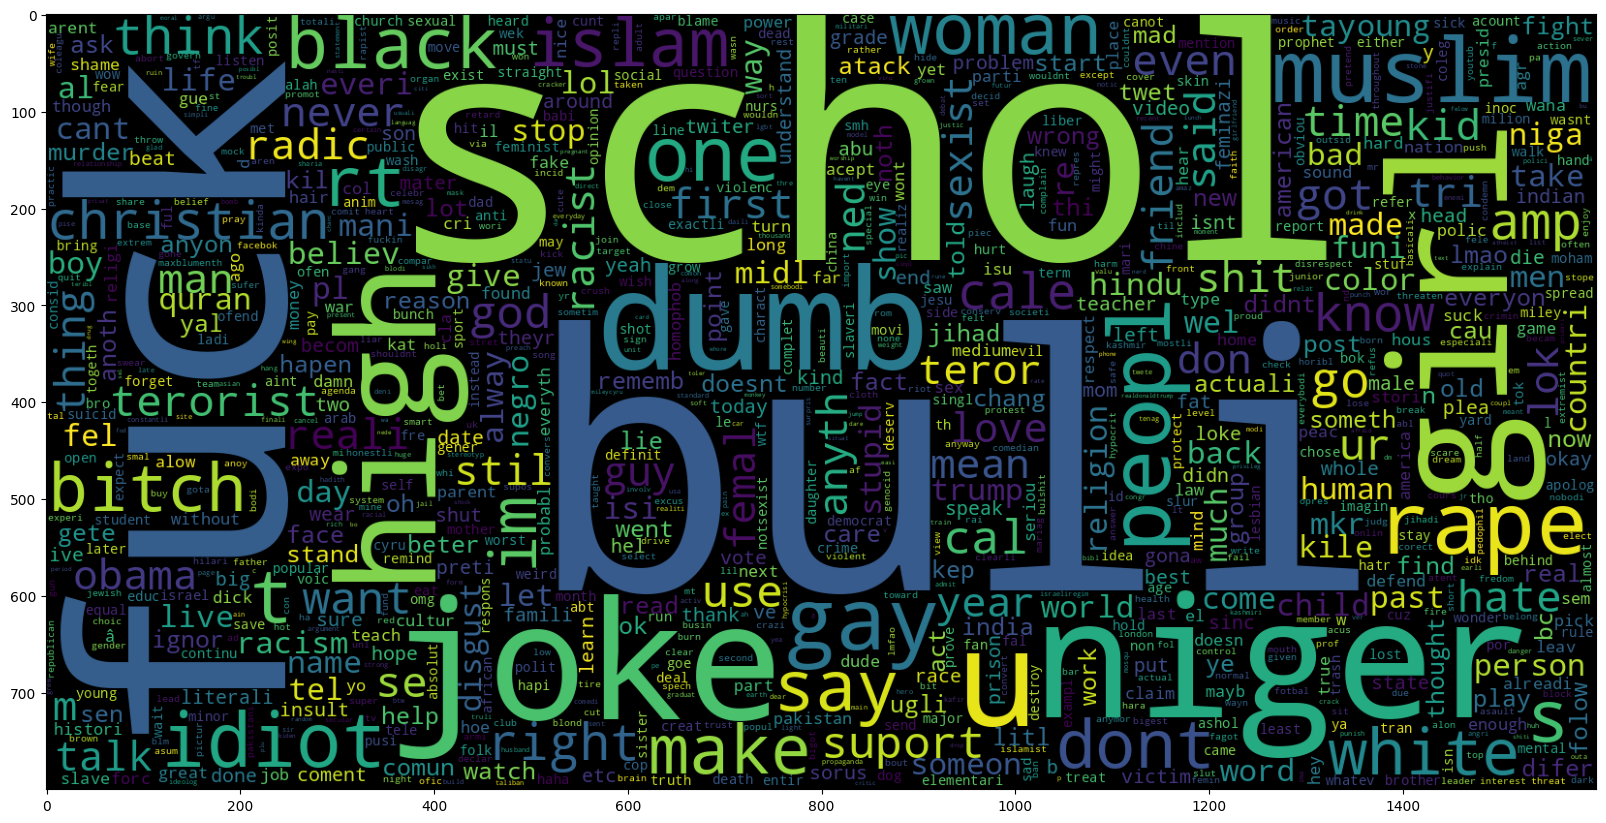

In [ ]:
# Word cloud excluding other_cyberbullying and not_cyberbullying value
plt.figure(figsize= (20,20))
wc = WordCloud(max_words=1000, width= 1600, height= 800,
                collocations= False).generate(' '.join(new_df))
plt.imshow(wc)

In [ ]:
# Creating a word cloud
# We will have to exclude the tweets which are not_cyberbullying for this task
data = pd.read_csv("cyberbullying_tweets.csv")
data = data[data['cyberbullying_type'] != "not_cyberbullying"]
data['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

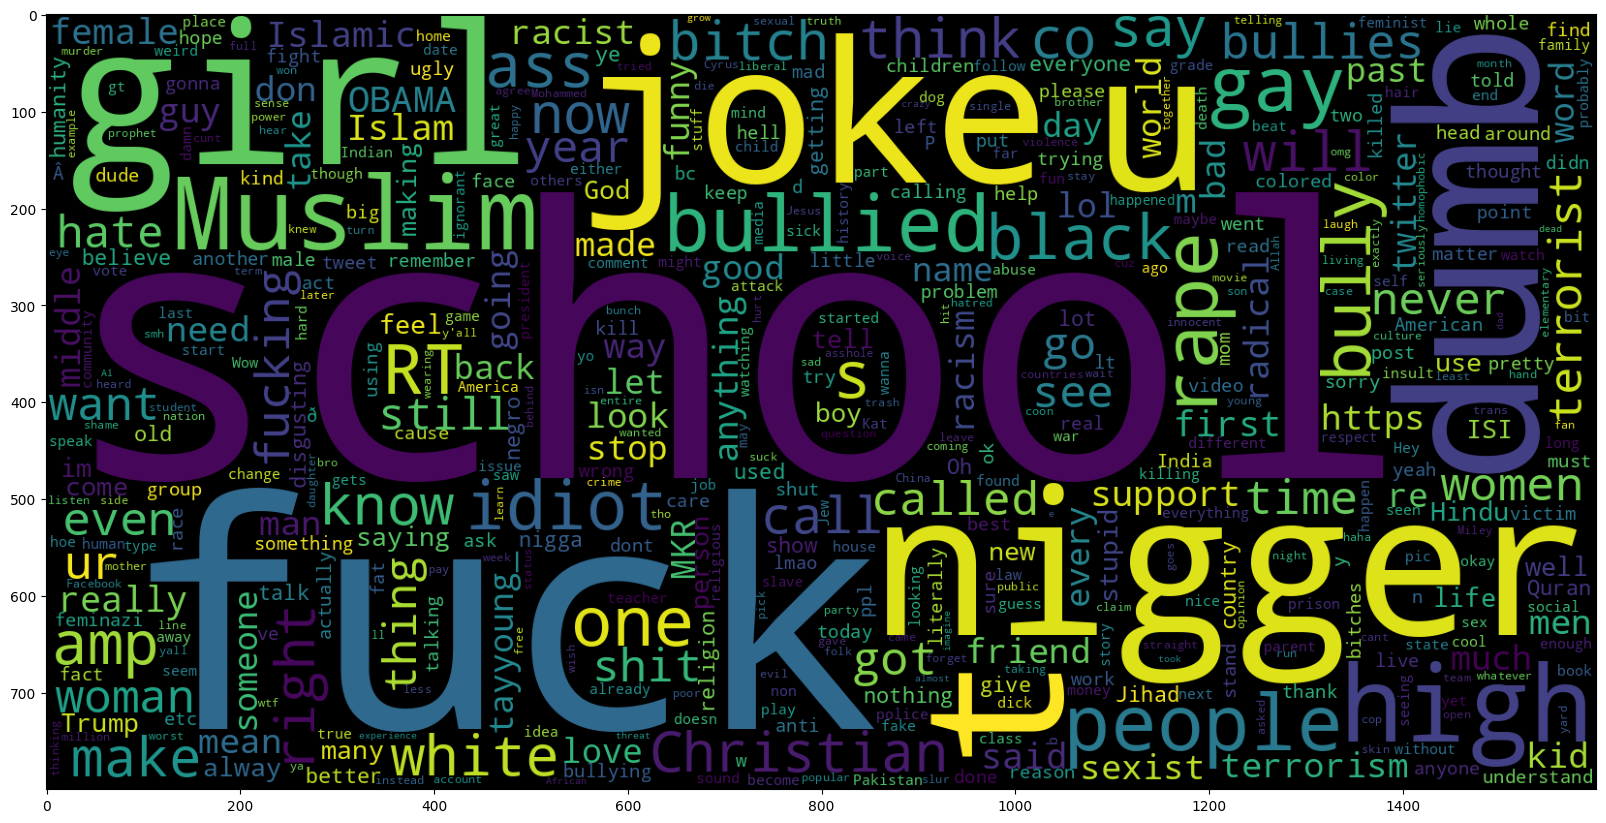

In [ ]:
# Word cloud excluding not_cyberbullying value
plotting_data = data['tweet_text']
plt.figure(figsize= (20,20))
wc = WordCloud(max_words=500, width= 1600, height= 800,
                collocations= False).generate(' '.join(plotting_data))
plt.imshow(wc)

In [ ]:
# Excluding the other_cyberbullying values and plotting again
data_2 = data[data['cyberbullying_type'] != "not_cyberbullying"]
data_2 = data[data['cyberbullying_type'] != "other_cyberbullying"]
data_2['cyberbullying_type'].value_counts()

religion     7998
age          7992
gender       7973
ethnicity    7961
Name: cyberbullying_type, dtype: int64

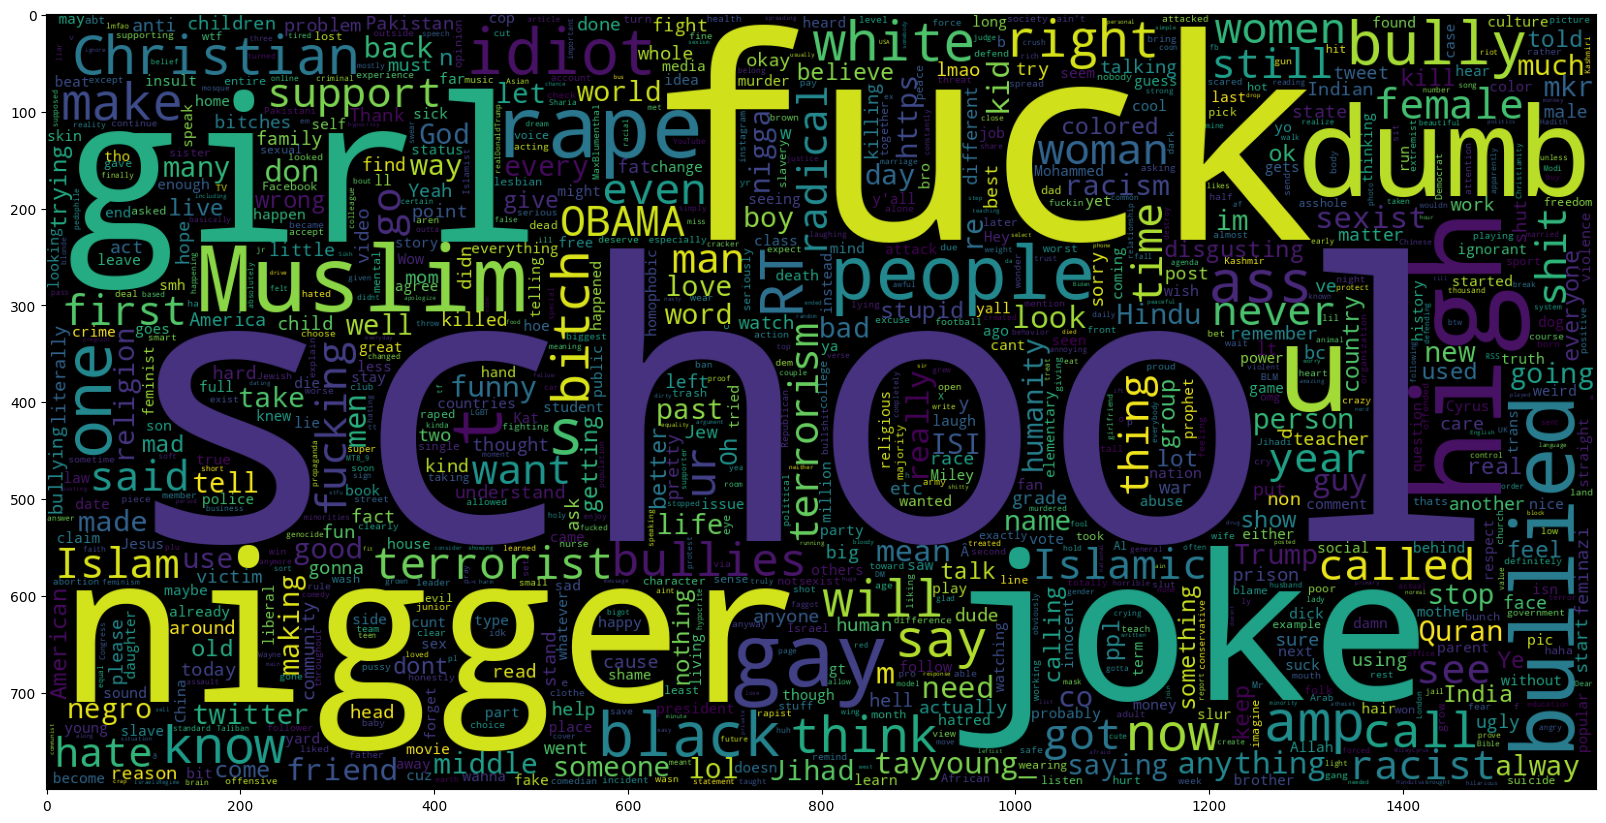

In [ ]:
# Word cloud excluding other_cyberbullying value
plotting_data = data_2['tweet_text']
plt.figure(figsize= (20,20))
wc = WordCloud(max_words=1000, width= 1600, height= 800,
                collocations= False).generate(' '.join(plotting_data))
plt.imshow(wc)

# **Data Preparation Before Modelling**

In [ ]:
# Display dataframe
df

,tweet_text,cyberbullying_type,cyberbullying_type_encoded
0,"[word, katandandr, fod, crapilici, mkr]",not_cyberbullying,3
1,"[ausietv, white, mkr, theblock, imacelebrityau...",not_cyberbullying,3
2,"[xochitlsuck, clasi, whore, red, velvet, cupcak]",not_cyberbullying,3
3,"[jasongio, meh, p, thank, head, up, but, not, ...",not_cyberbullying,3
4,"[rudhoenglish, isi, acount, pretend, kurdish, ...",not_cyberbullying,3
...,...,...,...
47687,"[black, pl, arent, expect, anyth, depend, anyt...",ethnicity,1
47688,"[turner, not, withold, disapoint, turner, cale...",ethnicity,1
47689,"[swear, god, dumb, niger, bitch, got, bleach, ...",ethnicity,1
47690,"[yea, fuck, rt, therealexel, niger, fuck, unfo...",ethnicity,1


In [ ]:
# Convert 'tweet_text' into single string
df['tweet_text'] = df['tweet_text'].apply(lambda x : " ".join(x))
df

,tweet_text,cyberbullying_type,cyberbullying_type_encoded
0,word katandandr fod crapilici mkr,not_cyberbullying,3
1,ausietv white mkr theblock imacelebrityau toda...,not_cyberbullying,3
2,xochitlsuck clasi whore red velvet cupcak,not_cyberbullying,3
3,jasongio meh p thank head up but not concern a...,not_cyberbullying,3
4,rudhoenglish isi acount pretend kurdish acount...,not_cyberbullying,3
...,...,...,...
47687,black pl arent expect anyth depend anyth yet f...,ethnicity,1
47688,turner not withold disapoint turner cale court...,ethnicity,1
47689,swear god dumb niger bitch got bleach hair rea...,ethnicity,1
47690,yea fuck rt therealexel niger fuck unfolow me ...,ethnicity,1


In [ ]:
#Create numpy array for targeted variable
y = df['cyberbullying_type_encoded']

In [ ]:
#Text Representation - Bag-of-Words
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(df['tweet_text'])
print("No. of feature words: ",len(bow_vectorizer.get_feature_names_out()))

No. of feature words:  51865


In [ ]:
#Text Representation - TFIDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features= 500000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tweet_text'])
print("No. of feature words: ",len(tfidf_vectorizer.get_feature_names_out()))

No. of feature words:  420486


In [ ]:
#Text Representation - Word2Vec
from gensim.models import Word2Vec
sentences = [sentence.split() for sentence in df['tweet_text']]
word2vec_model = Word2Vec(sentences, min_count=1)
sentence_embeddings = []
for sentence in sentences:
    embeddings = [word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv]
    if embeddings:
        sentence_embeddings.append(np.mean(embeddings, axis=0))
    else:
        sentence_embeddings.append(np.zeros(word2vec_model.vector_size))  # Use zero vector for out-of-vocabulary words
sentence_embeddings = np.array(sentence_embeddings)

In [ ]:
#Splitting data into train and test data set for Bag Of Word
bowX_train, bowX_test, bowy_train, bowy_test = train_test_split(bow_matrix, y, test_size=0.2, random_state=42)

In [ ]:
#Splitting data into train and test data set for TFIDF
tfX_train, tfX_test, tfy_train, tfy_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

In [ ]:
#Splitting data into train and test data set for word2Vec
wordX_train, wordX_test, wordy_train, wordy_test = train_test_split(sentence_embeddings, y, test_size= 0.2, random_state= 42)

# **Model Creation**


In [ ]:
# Bag SVM Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix
bowsvm_model_linear = SVC(kernel= 'linear', C = 1).fit(bowX_train, bowy_train)
bowsvm_predictions  = bowsvm_model_linear.predict(bowX_test)
print(classification_report(bowy_test, bowsvm_predictions))
print(confusion_matrix(bowy_test,bowsvm_predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1603
           1       0.98      0.97      0.97      1603
           2       0.87      0.85      0.86      1531
           3       0.56      0.53      0.54      1624
           4       0.58      0.64      0.61      1612
           5       0.95      0.92      0.94      1566

    accuracy                           0.81      9539
   macro avg       0.82      0.81      0.81      9539
weighted avg       0.81      0.81      0.81      9539

[[1548    3    7   31   12    2]
 [   5 1554    7   12   18    7]
 [   5    7 1303   95  118    3]
 [  35    6   87  860  582   54]
 [  13    8   89  465 1034    3]
 [   3    9   10   85   14 1445]]


In [ ]:
# TFIDF SVM Model
tfsvm_model_linear = SVC(kernel= 'linear', C = 1).fit(tfX_train, tfy_train)
tfsvm_predictions  = tfsvm_model_linear.predict(tfX_test)
print(classification_report(tfy_test, tfsvm_predictions))
print(confusion_matrix(tfy_test,tfsvm_predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1603
           1       0.99      0.97      0.98      1603
           2       0.91      0.82      0.86      1531
           3       0.58      0.55      0.57      1624
           4       0.58      0.69      0.63      1612
           5       0.96      0.94      0.95      1566

    accuracy                           0.82      9539
   macro avg       0.83      0.82      0.82      9539
weighted avg       0.83      0.82      0.82      9539

[[1549    0    4   28   22    0]
 [   3 1554    3   13   27    3]
 [   2    3 1252  126  145    3]
 [  44    6   50  897  573   54]
 [   8    4   67  416 1111    6]
 [   2    3    3   68   25 1465]]


In [ ]:
# Word SVM Model
wordsvm_model_linear = SVC(kernel= 'linear', C = 1).fit(wordX_train, wordy_train)
wordsvm_predictions  = wordsvm_model_linear.predict(wordX_test)
print(classification_report(wordy_test, wordsvm_predictions))
print(confusion_matrix(wordy_test, wordsvm_predictions))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1603
           1       0.92      0.90      0.91      1603
           2       0.84      0.72      0.78      1531
           3       0.57      0.40      0.47      1624
           4       0.52      0.74      0.61      1612
           5       0.87      0.88      0.87      1566

    accuracy                           0.76      9539
   macro avg       0.77      0.76      0.76      9539
weighted avg       0.77      0.76      0.76      9539

[[1507    2    5   59   29    1]
 [  11 1438   27   22   67   38]
 [   9   26 1099  138  231   28]
 [  86   30   60  643  712   93]
 [  23   36   88  211 1199   55]
 [   4   30   26   58   68 1380]]


In [ ]:
#Bag RF Model
from sklearn.ensemble import RandomForestClassifier
bowrfc_model = RandomForestClassifier(n_estimators=100).fit(bowX_train, bowy_train)
bowrfc_predictions = bowrfc_model.predict(bowX_test)
print(classification_report(bowy_test, bowrfc_predictions))
print(confusion_matrix(bowy_test,bowrfc_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1603
           1       0.98      0.98      0.98      1603
           2       0.88      0.83      0.85      1531
           3       0.57      0.49      0.53      1624
           4       0.55      0.66      0.60      1612
           5       0.96      0.96      0.96      1566

    accuracy                           0.81      9539
   macro avg       0.82      0.81      0.81      9539
weighted avg       0.82      0.81      0.81      9539

[[1559    1    5   25   12    1]
 [   4 1571    3    7   16    2]
 [   2    4 1271   96  156    2]
 [  30    7   62  789  677   59]
 [  13    8   98  422 1065    6]
 [   0    5    4   40   18 1499]]


In [ ]:
#TFIDF RF Model
tfrfc_model = RandomForestClassifier(n_estimators=100).fit(tfX_train, tfy_train)
tfrfc_predictions = tfrfc_model.predict(tfX_test)
print(classification_report(tfy_test, tfrfc_predictions))
print(confusion_matrix(tfy_test,tfrfc_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1603
           1       0.99      0.97      0.98      1603
           2       0.91      0.81      0.85      1531
           3       0.58      0.45      0.51      1624
           4       0.54      0.71      0.61      1612
           5       0.95      0.96      0.95      1566

    accuracy                           0.81      9539
   macro avg       0.82      0.81      0.81      9539
weighted avg       0.82      0.81      0.81      9539

[[1562    0    3   16   20    2]
 [   2 1561    2    9   25    4]
 [   1    4 1234  107  181    4]
 [  31    8   51  737  733   64]
 [  14    3   66  372 1149    8]
 [   0    3    6   26   28 1503]]


In [ ]:
#Word RF Model
wordrfc_model = RandomForestClassifier(n_estimators=100).fit(wordX_train, wordy_train)
wordrfc_predictions = wordrfc_model.predict(wordX_test)
print(classification_report(wordy_test, wordrfc_predictions))
print(confusion_matrix(wordy_test, wordrfc_predictions))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1603
           1       0.91      0.89      0.90      1603
           2       0.86      0.73      0.79      1531
           3       0.51      0.44      0.47      1624
           4       0.46      0.55      0.50      1612
           5       0.83      0.90      0.86      1566

    accuracy                           0.74      9539
   macro avg       0.75      0.74      0.74      9539
weighted avg       0.75      0.74      0.74      9539

[[1520   10    3   19   35   16]
 [  14 1431   15   17   56   70]
 [  10   33 1118  139  202   29]
 [  68   18   61  715  661  101]
 [  36   52   93  473  889   69]
 [   6   25   15   39   75 1406]]


In [ ]:
#Bag LR Model
from sklearn.linear_model import LogisticRegression
bowlr_model=LogisticRegression().fit(bowX_train, bowy_train)
bowlr_predictions = bowlr_model.predict(bowX_test)
print(classification_report(bowy_test, bowlr_predictions))
print(confusion_matrix(bowy_test,bowlr_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1603
           1       0.99      0.97      0.98      1603
           2       0.89      0.84      0.87      1531
           3       0.57      0.56      0.56      1624
           4       0.58      0.64      0.61      1612
           5       0.96      0.94      0.95      1566

    accuracy                           0.82      9539
   macro avg       0.83      0.82      0.82      9539
weighted avg       0.82      0.82      0.82      9539

[[1557    1    7   19   17    2]
 [   6 1556    5   10   20    6]
 [   3    2 1287  108  127    4]
 [  31    4   63  905  569   52]
 [  13    7   75  479 1036    2]
 [   2    3    3   67   18 1473]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#TFIDF LR Model
tflr_model=LogisticRegression().fit(tfX_train, tfy_train)
tflr_predictions = tflr_model.predict(tfX_test)
print(classification_report(tfy_test, tflr_predictions))
print(confusion_matrix(tfy_test,tflr_predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1603
           1       0.99      0.96      0.97      1603
           2       0.92      0.80      0.85      1531
           3       0.57      0.56      0.56      1624
           4       0.58      0.68      0.63      1612
           5       0.95      0.93      0.94      1566

    accuracy                           0.82      9539
   macro avg       0.83      0.82      0.82      9539
weighted avg       0.83      0.82      0.82      9539

[[1551    1    4   27   20    0]
 [   3 1539    4   20   33    4]
 [   3    3 1224  146  150    5]
 [  49    6   44  908  566   51]
 [  10    4   55  424 1103   16]
 [   2    2    5   80   15 1462]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Word LR Model
wordlr_model=LogisticRegression().fit(wordX_train, wordy_train)
wordlr_predictions = wordlr_model.predict(wordX_test)
print(classification_report(wordy_test, wordlr_predictions))
print(confusion_matrix(wordy_test, wordlr_predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1603
           1       0.87      0.82      0.84      1603
           2       0.77      0.70      0.73      1531
           3       0.50      0.46      0.47      1624
           4       0.51      0.58      0.55      1612
           5       0.80      0.87      0.83      1566

    accuracy                           0.72      9539
   macro avg       0.72      0.72      0.72      9539
weighted avg       0.72      0.72      0.72      9539

[[1461    5   10  100   20    7]
 [  19 1312   47   38   69  118]
 [  15   61 1067  170  185   33]
 [  82   41  101  739  557  104]
 [  34   51  114  386  940   87]
 [   2   41   49   59   59 1356]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
